## Clustering

<div dir=rtl style="text-align: left">
هدف پروژه: خوشه‌بندی کاربران یک شبکه اجتماعی بر اساس سن (Age) و درآمد تخمینی (Estimated Salary) برای تحلیل الگوهای رفتاری.
</div>

In [1]:
# =====================
# import libraries
# =====================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [22]:
# =====================
# load dataset
# =====================

df = pd.read_csv("Social_Network_Ads.csv")

In [23]:
# =====================
# basic info
# =====================

print("First 5 rows:")
print(df.head())

print("\nShape of dataset:")
print(df.shape)

print("\nData types:")
print(df.dtypes)

First 5 rows:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Shape of dataset:
(400, 5)

Data types:
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [26]:
# =====================
# preprocessing
# =====================

# Keep only numerical columns needed for clustering
df_cluster = df[['Age', 'EstimatedSalary']].copy()

# Check for NaN values
print("\nMissing values:")
print(df_cluster.isnull().sum())

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)


Missing values:
Age                0
EstimatedSalary    0
dtype: int64


/tmp/ipykernel_6166/434464139.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


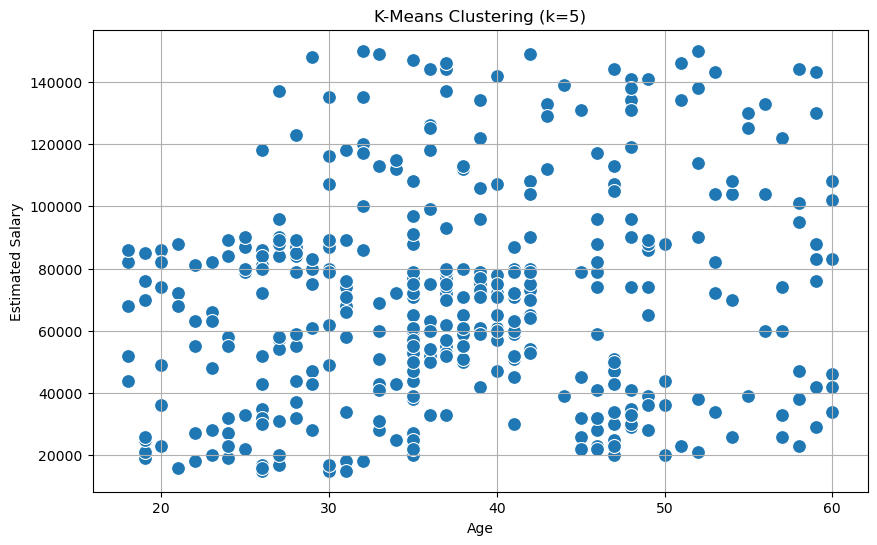

In [66]:
# =====================
# Visualization
# =====================

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age', y='EstimatedSalary',
    palette='tab10',
    data=df,
    s=100
)
plt.title('K-Means Clustering (k=5)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()

### K-Means algorithm

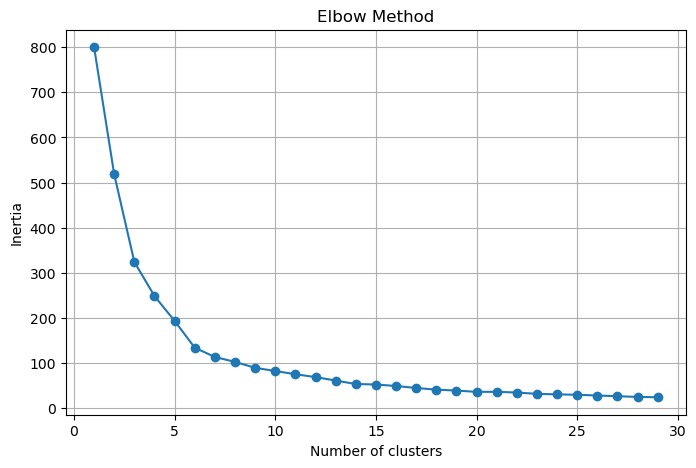

In [27]:
# =====================
# Elbow Method to find optimal number of clusters
# =====================

inertia = []

for k in range(1,  30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 30), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
# =====================
# KMeans clustering
# =====================

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to original dataframe
df_cluster['Cluster'] = clusters

In [29]:
print(df_cluster)

     Age  EstimatedSalary  Cluster
0     19            19000        5
1     35            20000        5
2     26            43000        5
3     27            57000        0
4     19            76000        0
..   ...              ...      ...
395   46            41000        2
396   51            23000        2
397   50            20000        2
398   36            33000        5
399   49            36000        2

[400 rows x 3 columns]


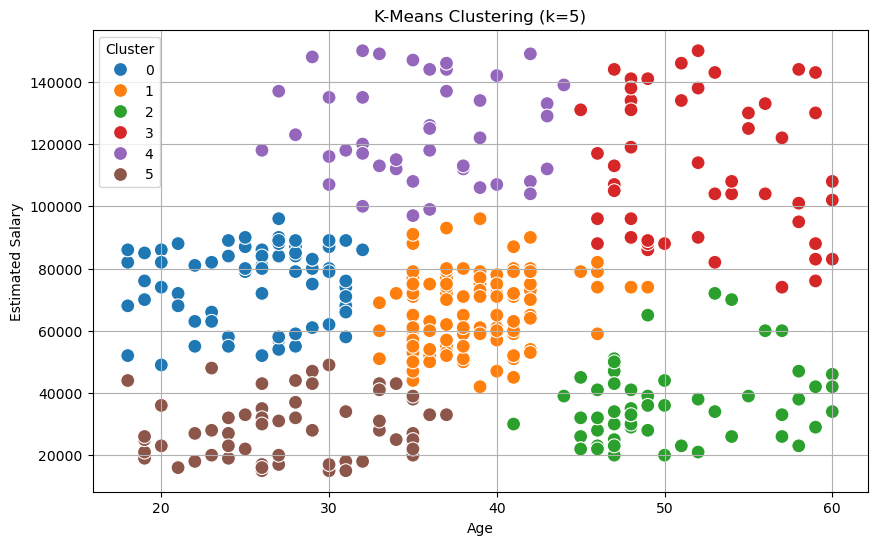

In [30]:
# =====================
# Visualization
# =====================

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age', y='EstimatedSalary',
    hue='Cluster',
    palette='tab10',
    data=df_cluster,
    s=100
)
plt.title('K-Means Clustering (k=5)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()

### DBSCAN algorithm

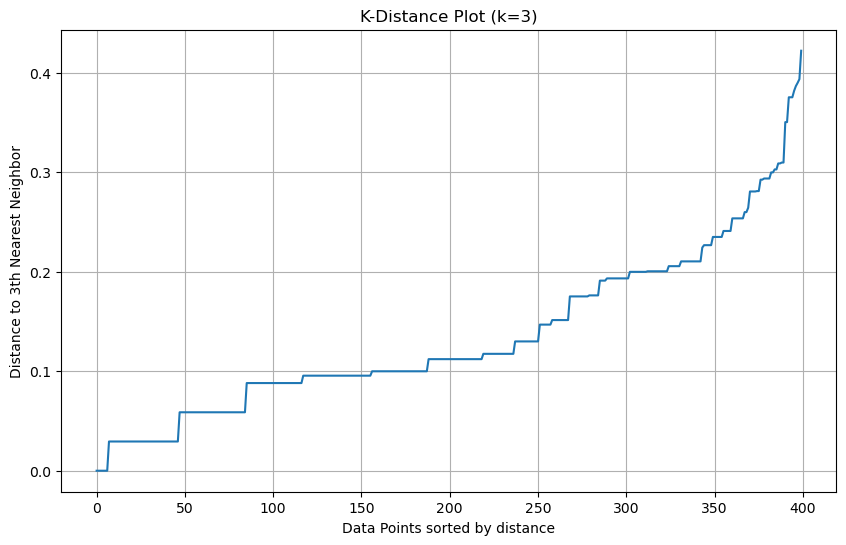

In [ ]:
# =====================
# K-Distance Plot
# =====================

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

min_samples = 3

# Fit NearestNeighbors on the scaled data
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(scaled_features)

# Find distances to k nearest neighbors
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Get the distances to the k-th neighbor for each point
k_distances = np.sort(distances[:, -1])

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title(f'K-Distance Plot (k={min_samples})')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.grid(True)
plt.show()

In [90]:
# =====================
# DBSCAN clustering
# =====================

# eps and min_samples need tuning depending on data
dbscan = DBSCAN(eps=0.2, min_samples=3)
labels = dbscan.fit_predict(scaled_features)

# Add labels to dataframe
df_cluster['Cluster'] = labels


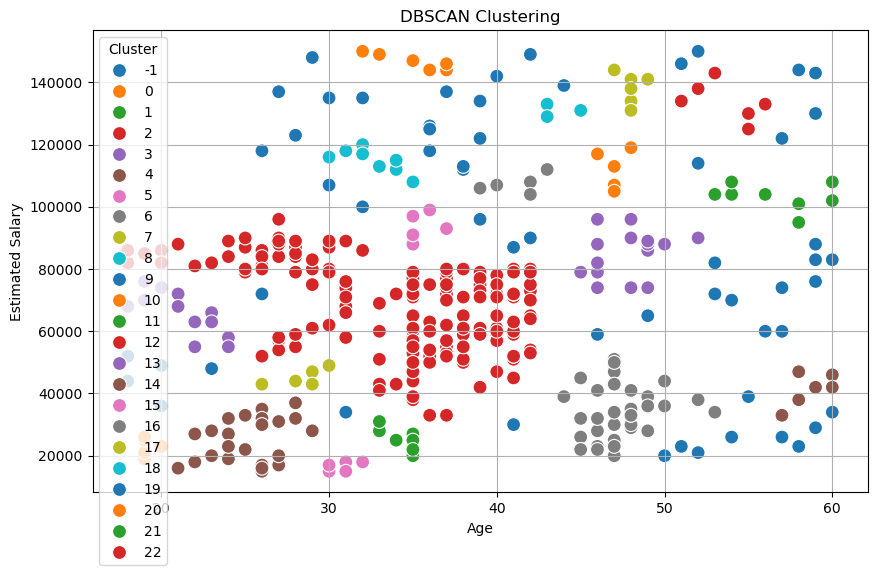

In [91]:
# =====================
# Visualization
# =====================

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='EstimatedSalary',
    hue='Cluster',
    palette='tab10',
    data=df_cluster,
    s=100
)
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()